In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

Файл содержит базовую информацию о пользователях интернет сервиса.

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/internet_service_churn.csv")

In [7]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [8]:
df.shape

(72274, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB




*   **id** -- уникальный идентификатор подписчика
*   **is_tv_subscriber** -- есть ли подписка на телефидение
*   **is_movie_package_subscriber** -- есть ли подписка на пакет фильмов
*   **subscription_age** -- сколько лет клиент пользуется услугами
*   **bill_avg** -- средний счет за последние 3 месяца
*   **reamining_contract** -- сколько лет осталось по контракту с клиентом.  если ноль;  у клиента нет контракта.  клиент, у которого есть контрактное время, должен использовать их услуги до окончания контракта.  если они отказались от услуги до истечения срока действия контракта, они уплачивают штраф за проезд
*   **service_failure_count** -- количество звонков клиентов в колл-центр по поводу сбоя в обслуживании за последние 3 месяца
*   **download_avg** -- использование Интернета за последние 3 месяца (ГБ)
*   **upload_avg** -- загрузка за последние 3 месяца в среднем (ГБ)
*   **download_over_limit** -- ограничение на загрузку, у большинства клиентов есть. Если они достигнут этого предела, им придется заплатить
*   **churn** -- покинул ли клиент компанию



In [10]:
for col in df.columns:
    cnt_na = df[col].isna().sum()
    if cnt_na:
        print( col, cnt_na )

reamining_contract 21572
download_avg 381
upload_avg 381


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


Отток составил 55,4 %

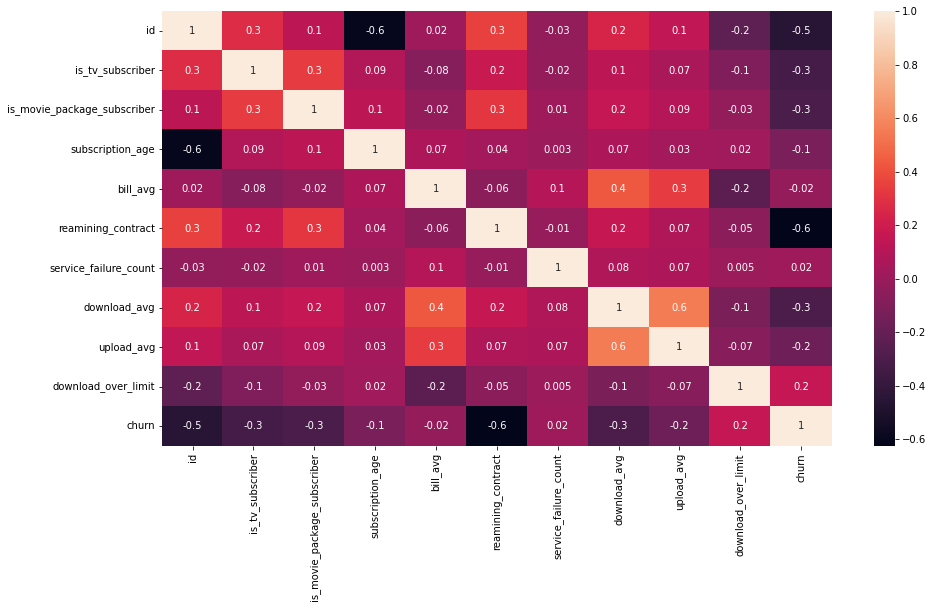

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g')

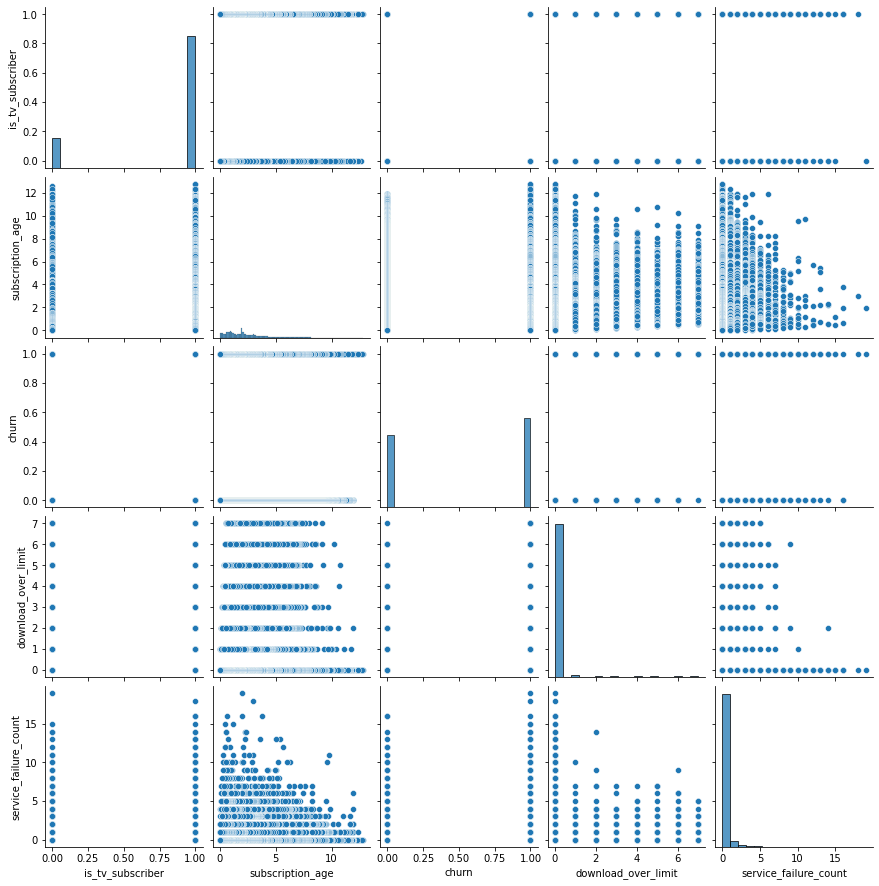

In [30]:
cols = ["is_tv_subscriber", "subscription_age", "churn", "download_over_limit", "service_failure_count"]
sns.pairplot(df[cols])